# PISA 2012 Data Exploration
## by Liangbin Chen

## Investigation Overview

The main purpose of the investigation is to explore the relationship between students' academic performance with other features.

## Dataset Overview
PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.
Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe, note that this csv is generated after data wrangle
df = pd.read_csv('after_uni_explore.csv')

In [5]:
#create numerical and categorical variable list for later use
numeric_vars = ['math', 'math_mins', 'out_hrs', 'wealth']
categorical_vars = ['OECD', 'gender', 'high_ISCED', 'grade']

In [6]:
#Convert `high_ISCED` to ordinal categorical data
ISCED_classes = ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, C', 'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    ISCEDclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ISCED_classes)
    df['high_ISCED'] = df['high_ISCED'].astype(ISCEDclasses)
else: # compatibility for v.20
    df['high_ISCED'] = df['high_ISCED'].astype('category', ordered = True,
                                                     categories = ISCED_classes)

## Numerical Features Crossplot

This is a crossplot of all numerical features. It is the best way to capture relationship between numerical features. Clearly we can see there is a positive relationship between math score with math study minutes and math score with wealth. There is no obvious relatioship between math score and after-school study hours.

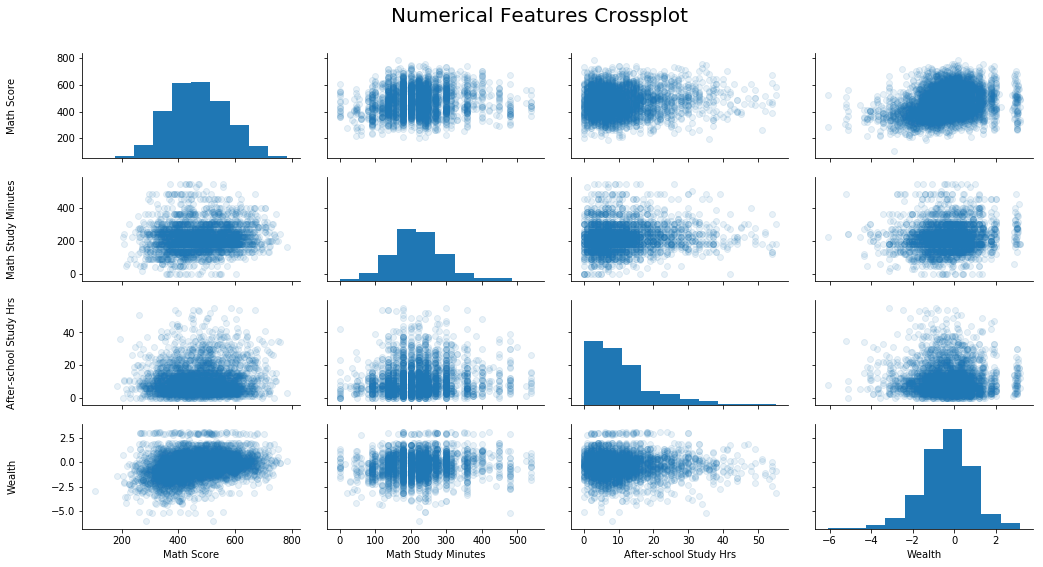

In [7]:
#create a sample dataframe so the Pair Grid will look less messy
df_sample = df.sample(5000)

#Pair Grid on sample data, figsize [14.70, 8.27] is used to adjust the plots
#height is slightly less than 8.27 to accommodate the title
g = sb.PairGrid(data = df_sample, vars = numeric_vars, height=8/4, aspect=(14.70/8.27))
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=0.1)
#create a title for the whole plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Numerical Features Crossplot', size=20)
#raname x and y labels properly and align them
replacements = {'math': 'Math Score', 'wealth': 'Wealth',
                'math_mins': 'Math Study Minutes', 'out_hrs': 'After-school Study Hrs'}
for i in range(4):
    for j in range(4):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])
        g.axes[i][j].get_yaxis().set_label_coords(-0.3,0.5);

In [8]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

## Numeric Features VS. Categorical Features

- From the plot we can see overall students in OECD countries have better math scores than those in non-OECD countries, male students performs better than female students, and students whose parents received better education score higher in math.   
- On the other hand, OECD students spend more time study math, their family have higher wealth over non-OECD students'  
- Students whose parents have higher education possess more wealth as well.  
- Students with higher grade also possess more wealth.
- Female students spend more hours study after school than male students.

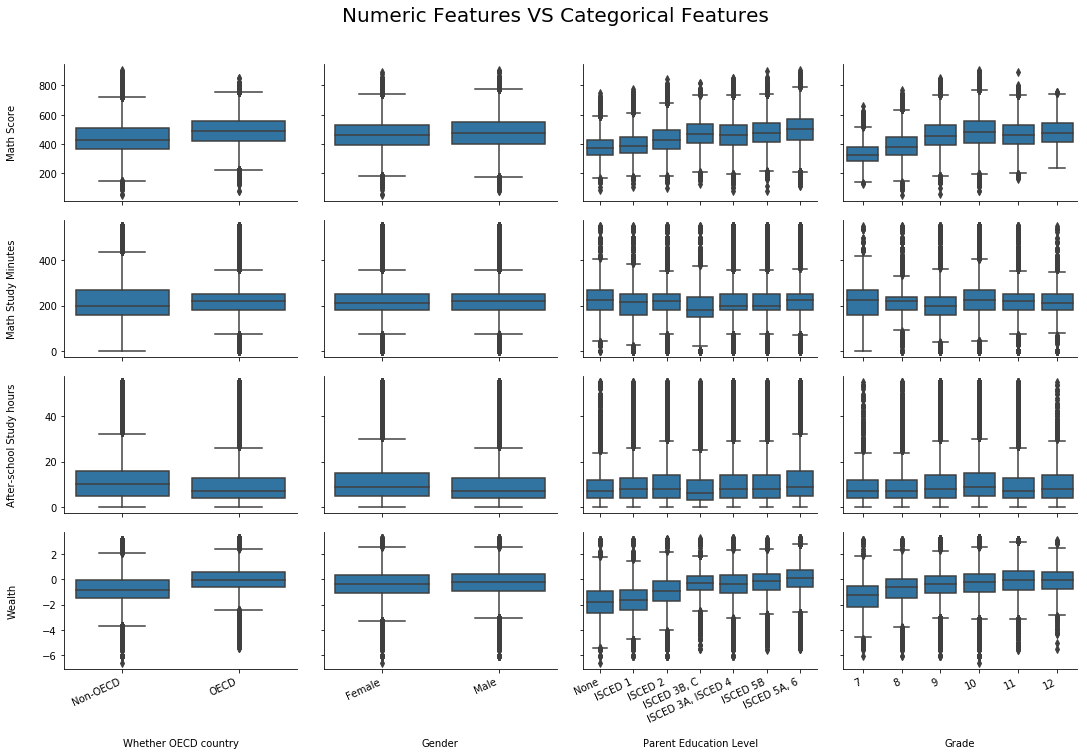

In [9]:
#create a boxplot PairGrid
g = sb.PairGrid(data = df, y_vars = numeric_vars, x_vars = categorical_vars,
                height = 2.5, aspect=1.5)
g.map(boxgrid)

#rotate xticks 25 deg
for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=25, horizontalalignment='right')
#create a title for the whole plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Numeric Features VS Categorical Features', size=20)
#rename x,y labels properly and align them
replacements = {'math': 'Math Score', 'wealth': 'Wealth',
                'math_mins': 'Math Study Minutes', 'out_hrs': 'After-school Study hours',
                'OECD': 'Whether OECD country', 'gender': 'Gender',
                'high_ISCED': 'Parent Education Level', 'grade':'Grade'}
for i in range(4):
    for j in range(4):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])
        #Align x and y axis labels
        g.axes[i][j].get_xaxis().set_label_coords(0.5,-0.5)
        g.axes[i][j].get_yaxis().set_label_coords(-0.2,0.5);


## Categorical Bar Plot
- students' parents in OECD countries have much higher education than non-OECD countries. 
- There is no obvious difference in term of parents' education level between male and female students. 
- The head counts of male students are slightly lower than female students in both OECD and non-OECD countries, but they are not significant.

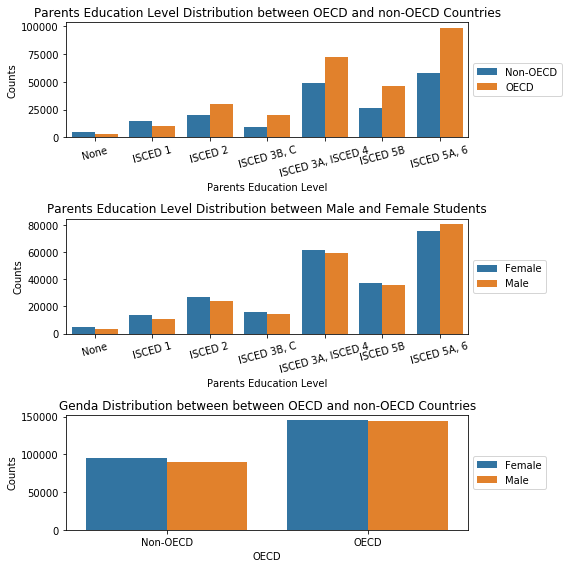

In [10]:
plt.figure(figsize=[8,8])
plt.subplot(3,1,1)
sb.countplot(data=df, x='high_ISCED', hue='OECD')
plt.xticks(rotation=15)
plt.title('Parents Education Level Distribution between OECD and non-OECD Countries')
plt.xlabel('Parents Education Level')
plt.ylabel('Counts')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplot(3,1,2)
sb.countplot(data=df, x='high_ISCED', hue='gender')
plt.xticks(rotation=15)
plt.title('Parents Education Level Distribution between Male and Female Students')
plt.xlabel('Parents Education Level')
plt.ylabel('Counts')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplot(3,1,3)
sb.countplot(data=df, x='OECD', hue='gender')
plt.title('Genda Distribution between between OECD and non-OECD Countries')
plt.ylabel('Counts')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()


- At this point we can conclude students in OECD countries are better in math because their parents are higher in education, they spent more time study math and their family possess more wealth compared to those in non-OECD countries. As a result, we can consider OECD as a dependent feature. Since I am analysing all other three features, I am not going to list this feature anymore.
- Because male students are better at math than female students, and this factor is not affected by any other factors, I am going to devide the sample to male and female students. This way, the distribution of male/female gender will not affect the final result.

In [11]:
#Create a subset of male and female students
df_m = df.query('gender == "Male"')

## Math VS. Grade and Parent Education Level
- Overall, the higher grade students have higher math scores with some exceptions. Students in grade 10 match the performance of grade 12. The reason behind this is grade 10 is the typical grade for age 16 students in all the developed countries and countries like China-Shanghai or Chinese-Taipei. As a result, parents shouldn't be attempted to send their children to grade 1 at 4 years old instead of typical 6 years old. 
- Among students in the same grade, students whose parents have higher education level peformed better in math scores.

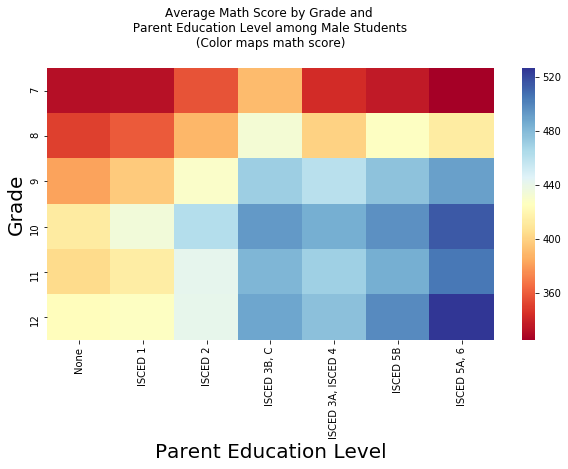

In [70]:
#create a pivot table to map math score to heatmap color
plt.figure(figsize=[10,5])
df_mean1 = df_m.groupby(['grade', 'high_ISCED'])['math'].mean().reset_index()
df_pivot1 = df_mean1.pivot('grade', 'high_ISCED', 'math')
sb.heatmap(df_pivot1, cmap = 'RdYlBu')
plt.title('Average Math Score by Grade and \n Parent Education Level among Male Students \n (Color maps math score) \n')
plt.xlabel('Parent Education Level', size=20)
plt.ylabel('Grade', size=20);

In [13]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(x.min(), x.max(), (x.max()-x.min())/50)
    bins_y = np.arange(100,900,20)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

To further explore the relationship between math score with wealth, math study mintues and after-school study hours, I am going to plot their relationship for each grade and parent education level. 

## Math VS. Wealth for each Grade and Parent Education Level
It is very obvious with the same grade, same parents education level, the math scores of male students are clearly positively related with the family wealth, especially among grade 8-10 students.

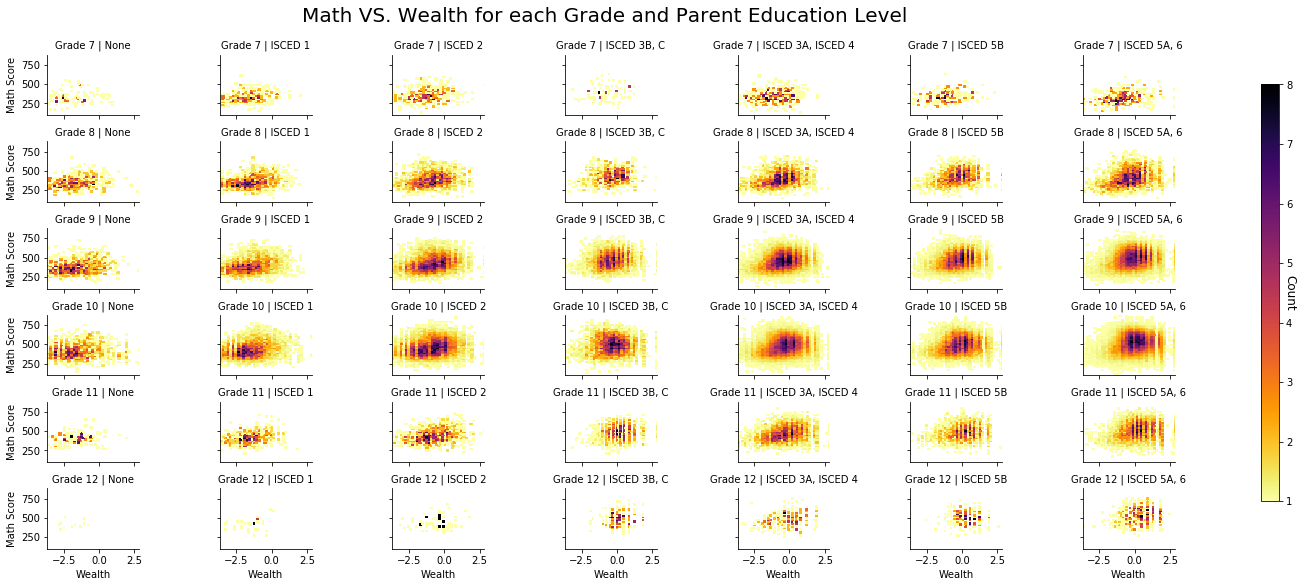

In [26]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = df_m, col = 'high_ISCED', row='grade', height=8.27/6, aspect=1.75)
g.map(hist2dgrid, 'wealth', 'math', color = 'inferno_r')
g.set_xlabels('Wealth')
g.set_ylabels('Math Score')
#set title for each subplot
g.set_titles(row_template = 'Grade {row_name}', col_template = '{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Math VS. Wealth for each Grade and Parent Education Level', size=20)
#add color bar on the right
cbar_ax = g.fig.add_axes([1.04,0.15, 0.015, 0.7])
plt.colorbar(cax=cbar_ax)
cbar_ax.set_ylabel('Count', rotation=270, fontsize = 12);

## Math VS. Math Study Minutes for each Grade and Parent Education Level
It appears there is a weak positive relations between `math` and `math_mins` for grade 9 and 10. It is more obvious when the parent education level is relatively low. 

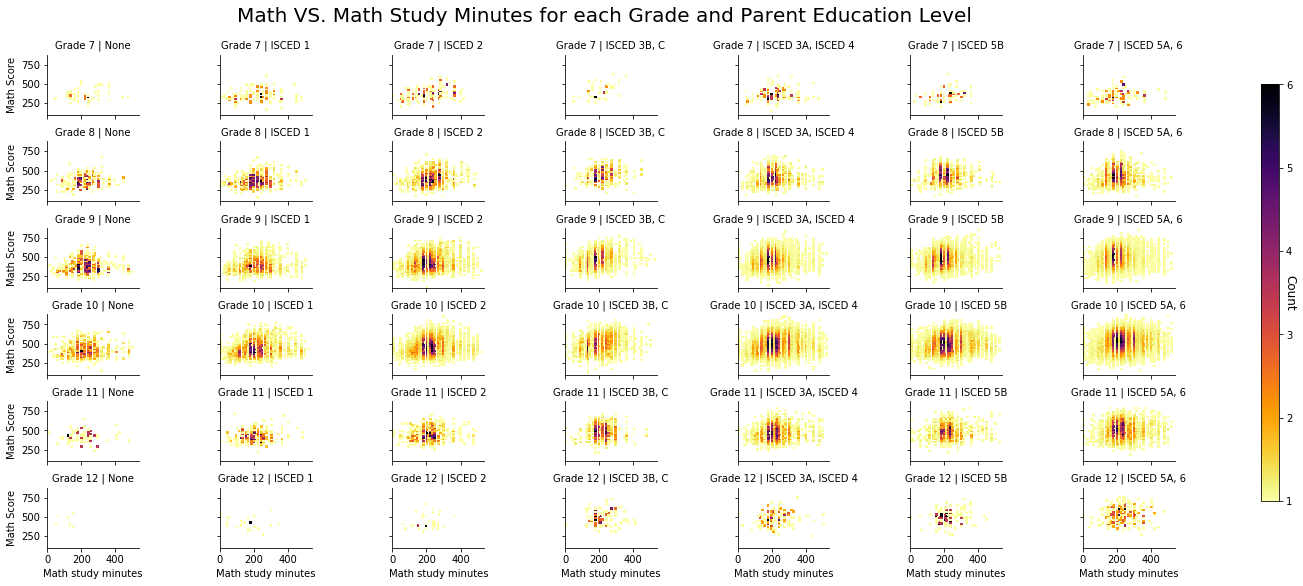

In [28]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = df_m, col = 'high_ISCED', row='grade', height=8.27/6, aspect=1.75)
g.map(hist2dgrid, 'math_mins', 'math', color = 'inferno_r')
g.set_xlabels('Math study minutes')
g.set_ylabels('Math Score')
#set title for each subplot
g.set_titles(row_template = 'Grade {row_name}', col_template = '{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Math VS. Math Study Minutes for each Grade and Parent Education Level', size=20)
#add color bar to the right
cbar_ax = g.fig.add_axes([1.04,0.15, 0.015, 0.7])
plt.colorbar(cax=cbar_ax)
cbar_ax.set_ylabel('Count', rotation=270, fontsize = 12);

## Math VS. After-School Study Hours for each Grade and Parent Education Level
There is no obvious relationship between math score and after-school study hours.

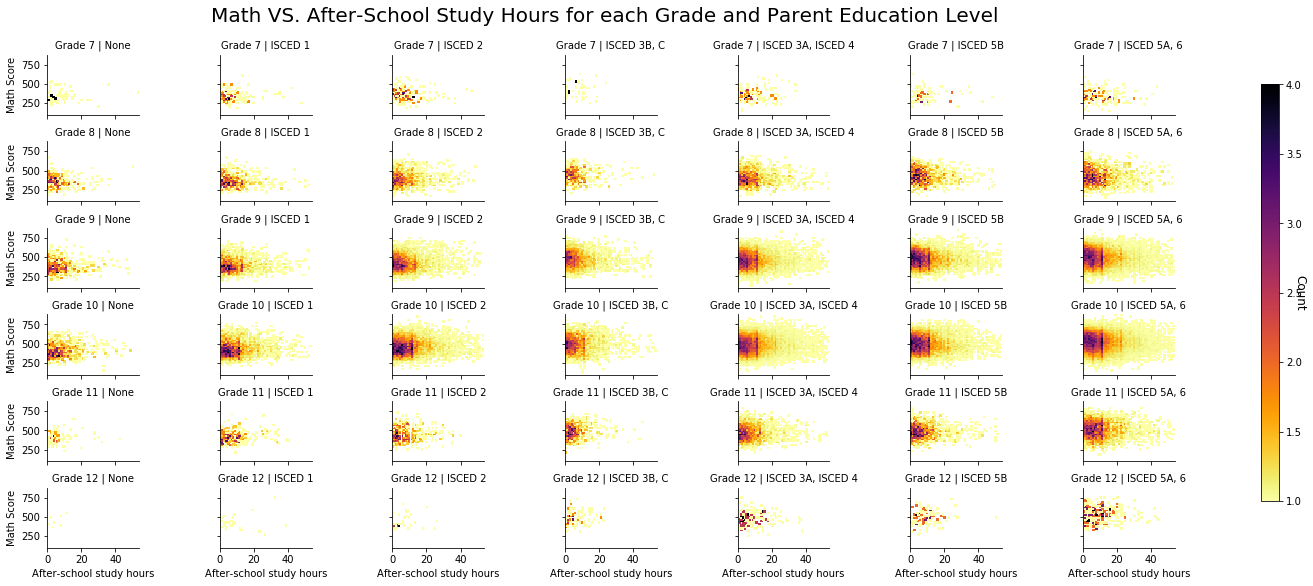

In [29]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = df_m, col = 'high_ISCED', row='grade', height=8.27/6, aspect=1.75)
g.map(hist2dgrid, 'out_hrs', 'math', color = 'inferno_r')
g.set_xlabels('After-school study hours')
g.set_ylabels('Math Score')
#set title for each subplot
g.set_titles(row_template = 'Grade {row_name}', col_template = '{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Math VS. After-School Study Hours for each Grade and Parent Education Level', size=20)
#add color bar to the right
cbar_ax = g.fig.add_axes([1.04,0.15, 0.015, 0.7])
plt.colorbar(cax=cbar_ax)
cbar_ax.set_ylabel('Count', rotation=270, fontsize = 12);

Now I want to dig into some specific countries and see if the relationships are still the same. I am going to take a look into the top 8 countries with highest average math scores. Since majority of students are in grade 10, I am not going to look into the case of grade 10 students.

In [64]:
df_m_top8_index = pd.Series(df.groupby('country')['math'].mean().sort_values(ascending=False)[:8].index)
df_m_top8 = df_m[df_m['country'].isin(df_m_top8_index)]
df_m_top8_grd10 = df_m_top8.query('grade == 10')

Because the next two plots will be packed with small plots, I need to shorten some of the country names and education level names.

In [65]:
#create a copy so it will not affect the original df
df_m_top8_grd10 = df_m_top8_grd10.copy()

In [66]:
#create a dictionary for str replacement
country_dict = {
                'China-Shanghai':'Shanghai', 'Hong Kong-China':'HK',  
                'Chinese Taipei':'Taipei', 'Liechtenstein':'Liech', 
                'Macao-China':'Macao' 
                }
#replace the str in country 
df_m_top8_grd10['country'] = df_m_top8_grd10['country'].replace(country_dict)

## Math VS. Math Study Minutes for Grade 10 Male Students
It appears math score has a strong positive relationship with math study minutes in some of the Asian countries including: Japan, Korea, China-Shanghai, Singapore, Chinese Taipei. The reason could be the academic competition in those countries are so fierce that every minutes they spend on the subject matters.

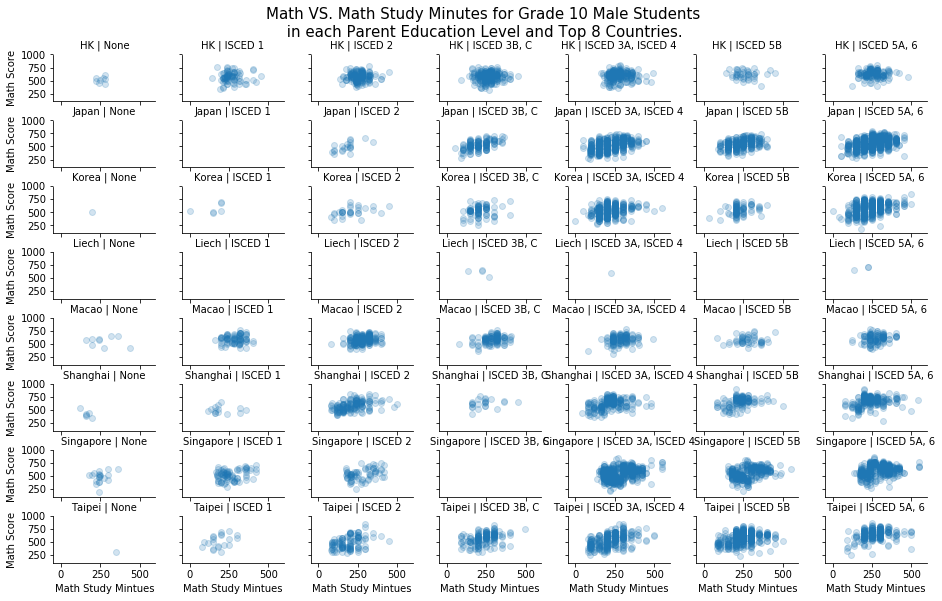

In [68]:
g = sb.FacetGrid(data = df_m_top8_grd10, col = 'high_ISCED', row='country', height=8.27/8, aspect=14.7/8.27)
g.map(plt.scatter, 'math_mins', 'math', alpha=0.2)
g.set_ylabels('Math Score')
g.set_xlabels('Math Study Mintues')
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Math VS. Math Study Minutes for Grade 10 Male Students\n in each Parent Education Level and Top 8 Countries.', size=15);

## Math VS. After-school Study Hours for Grade 10 Male Students 
It appears math score has positive relationship with after-school study hours in some Asian countries including: Japan, Korea, China-Shanghai, Singapore, Chinese Taipei. 

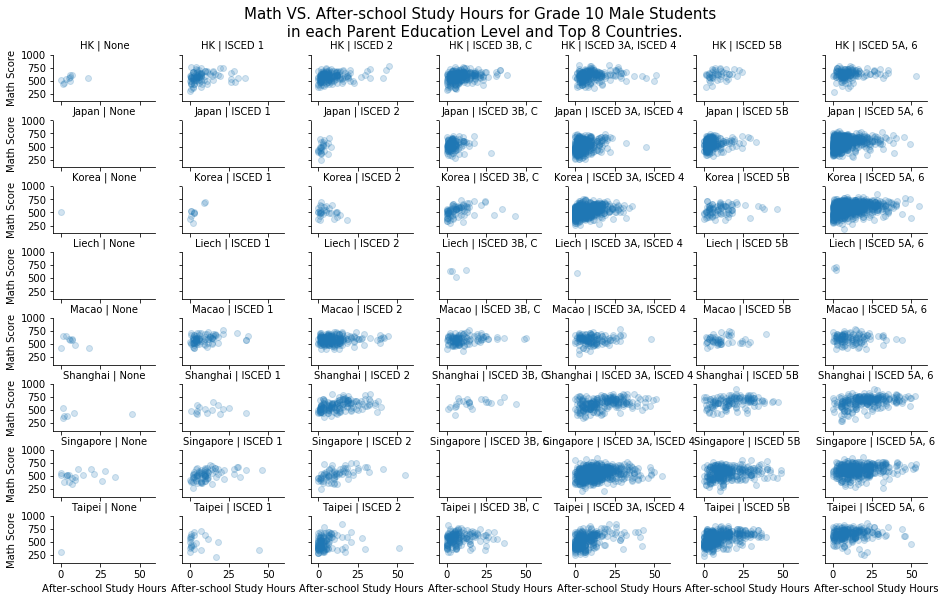

In [69]:
g = sb.FacetGrid(data = df_m_top8_grd10, col = 'high_ISCED', row='country', height=8.27/8, aspect=14.7/8.27)
g.map(plt.scatter, 'out_hrs', 'math', alpha=0.2)
g.set_ylabels('Math Score')
g.set_xlabels('After-school Study Hours')
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Math VS. After-school Study Hours for Grade 10 Male Students \n in each Parent Education Level and Top 8 Countries.', size=15);

   ## Conclusions
- Male students are better in math than female students.
- Students in OECD countries are better in math than those in non-OECD countries.
- Globally, the students' math performance is positively related to their grade, their parents' education level and family wealth. It has a weak positive relationship with the time they spend on math. It has no obvious relationship with the after-school study hours and class size. 
- For some of the Asian countries whose students are top performers in math, there is a strong positive relationship between math score and their time spent on math. There is moderate positive relationship between math score and after-school study hours. 

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!